# Mobility Pattern Insights
This project aims to analyze urban mobility pattern, with the main objective to gain insights into how various factors—such as public transport usage, traffic flow, bike-sharing, and pedestrian counts—shape mobility behaviors in urban areas.

Using data analysis techniques, we aim to uncover trends and patterns within a synthetic urban mobility data that can inform future urban planning and enhance the understanding of transportation dynamics in the city.

In [1]:
# Import libraries for Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data into a DataFrame
df = pd.read_csv('urban_mobility_dataset.csv')

# Display DataFrame head
display(df.head())

# Print DataFrame dimensions
print("\nDataframe dimensions:")
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
print(df.info())

,timestamp,public_transport_usage,traffic_flow,bike_sharing_usage,pedestrian_count,weather_conditions,day_of_week,holiday,event,temperature,humidity,road_incidents,public_transport_delay,bike_availability,pedestrian_incidents
0,2023-01-01 00:00:00,292,3681,296,1939,Clear,Sunday,0,NaN,24.547380,29,0,5.263106,22,4
1,2023-01-01 01:00:00,340,4743,96,688,Snow,Sunday,0,NaN,31.801722,99,3,0.523627,88,2
2,2023-01-01 02:00:00,372,3491,183,1774,Rain,Sunday,0,NaN,0.052832,34,6,0.408793,93,2
3,2023-01-01 03:00:00,365,4360,214,24,Rain,Sunday,0,NaN,-3.757874,41,4,27.640844,89,3
4,2023-01-01 04:00:00,226,121,247,224,Snow,Sunday,0,NaN,-4.948219,45,3,14.820891,49,3



Dataframe dimensions:
Number of rows:  1000000
Number of columns:  15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   timestamp               1000000 non-null  object 
 1   public_transport_usage  1000000 non-null  int64  
 2   traffic_flow            1000000 non-null  int64  
 3   bike_sharing_usage      1000000 non-null  int64  
 4   pedestrian_count        1000000 non-null  int64  
 5   weather_conditions      1000000 non-null  object 
 6   day_of_week             1000000 non-null  object 
 7   holiday                 1000000 non-null  int64  
 8   event                   200513 non-null   object 
 9   temperature             1000000 non-null  float64
 10  humidity                1000000 non-null  int64  
 11  road_incidents          1000000 non-null  int64  
 12  public_transport_delay  1000000 non-null  

In [3]:
# Check data for missing values
print("Number of instances with missing values:")
print(df.isnull().sum())

Number of instances with missing values:
timestamp                      0
public_transport_usage         0
traffic_flow                   0
bike_sharing_usage             0
pedestrian_count               0
weather_conditions             0
day_of_week                    0
holiday                        0
event                     799487
temperature                    0
humidity                       0
road_incidents                 0
public_transport_delay         0
bike_availability              0
pedestrian_incidents           0
dtype: int64


In [4]:
df['timestamp_converted'] = pd.to_datetime(df['timestamp'])
df = df.drop(columns=['timestamp'])
df.insert(0,'date',df['timestamp_converted'].dt.date)
df.insert(1,'time',df['timestamp_converted'].dt.time)

display(df)

,date,time,public_transport_usage,traffic_flow,bike_sharing_usage,pedestrian_count,weather_conditions,day_of_week,holiday,event,temperature,humidity,road_incidents,public_transport_delay,bike_availability,pedestrian_incidents,timestamp_converted
0,2023-01-01,00:00:00,292,3681,296,1939,Clear,Sunday,0,NaN,24.547380,29,0,5.263106,22,4,2023-01-01 00:00:00
1,2023-01-01,01:00:00,340,4743,96,688,Snow,Sunday,0,NaN,31.801722,99,3,0.523627,88,2,2023-01-01 01:00:00
2,2023-01-01,02:00:00,372,3491,183,1774,Rain,Sunday,0,NaN,0.052832,34,6,0.408793,93,2,2023-01-01 02:00:00
3,2023-01-01,03:00:00,365,4360,214,24,Rain,Sunday,0,NaN,-3.757874,41,4,27.640844,89,3,2023-01-01 03:00:00
4,2023-01-01,04:00:00,226,121,247,224,Snow,Sunday,0,NaN,-4.948219,45,3,14.820891,49,3,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2137-01-29,11:00:00,452,1117,189,599,Clear,Tuesday,0,NaN,34.738752,90,0,9.414779,3,0,2137-01-29 11:00:00
999996,2137-01-29,12:00:00,348,950,261,1344,Snow,Tuesday,0,NaN,10.753334,75,1,26.964666,88,3,2137-01-29 12:00:00
999997,2137-01-29,13:00:00,130,1620,87,98,Fog,Tuesday,1,NaN,16.771888,55,8,0.019880,94,0,2137-01-29 13:00:00
999998,2137-01-29,14:00:00,177,3217,12,516,Clear,Tuesday,0,NaN,-7.029623,48,9,2.938070,12,4,2137-01-29 14:00:00


### Dataset Overview
The dataset begins from the year 2023 and includes projections extending up to 100 years. For the purpose of this analysis, we focus specifically on data from the year 2023.

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
filtered_df = df[df['year'] == 2023]
filtered_df = filtered_df.drop(columns=['timestamp_converted','year'])
filtered_df.set_index('date', inplace=True)
print("\nFiltered DataFrame for year 2023:")
display(filtered_df)


Filtered DataFrame for year 2023:


,time,public_transport_usage,traffic_flow,bike_sharing_usage,pedestrian_count,weather_conditions,day_of_week,holiday,event,temperature,humidity,road_incidents,public_transport_delay,bike_availability,pedestrian_incidents
date,,,,,,,,,,,,,,,
2023-01-01,00:00:00,292,3681,296,1939,Clear,Sunday,0,NaN,24.547380,29,0,5.263106,22,4
2023-01-01,01:00:00,340,4743,96,688,Snow,Sunday,0,NaN,31.801722,99,3,0.523627,88,2
2023-01-01,02:00:00,372,3491,183,1774,Rain,Sunday,0,NaN,0.052832,34,6,0.408793,93,2
2023-01-01,03:00:00,365,4360,214,24,Rain,Sunday,0,NaN,-3.757874,41,4,27.640844,89,3
2023-01-01,04:00:00,226,121,247,224,Snow,Sunday,0,NaN,-4.948219,45,3,14.820891,49,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,19:00:00,273,1361,242,31,Snow,Sunday,0,NaN,-3.391895,80,9,14.054249,70,3
2023-12-31,20:00:00,158,2936,270,244,Fog,Sunday,0,NaN,24.825429,36,5,6.699768,9,4
2023-12-31,21:00:00,305,3411,115,1541,Fog,Sunday,0,NaN,-9.937907,26,4,22.010309,3,3


In [6]:
# We look at the descriptive statistics of the dataset
filtered_df.describe().T

,count,mean,std,min,25%,50%,75%,max
public_transport_usage,8760.0,274.120890,130.530267,50.000000,159.000000,276.000000,388.250000,499.000000
traffic_flow,8760.0,2568.489954,1416.186835,100.000000,1343.000000,2579.000000,3791.500000,4998.000000
bike_sharing_usage,8760.0,149.680137,86.354428,0.000000,74.000000,149.000000,225.000000,299.000000
pedestrian_count,8760.0,1006.432991,570.218242,20.000000,512.500000,1003.500000,1503.250000,1999.000000
holiday,8760.0,0.105023,0.306600,0.000000,0.000000,0.000000,0.000000,1.000000
temperature,8760.0,12.572855,12.998696,-9.999053,1.163651,12.701370,23.674379,34.999205
humidity,8760.0,59.641781,23.088635,20.000000,40.000000,60.000000,80.000000,99.000000
road_incidents,8760.0,4.509817,2.871315,0.000000,2.000000,5.000000,7.000000,9.000000
public_transport_delay,8760.0,15.049285,8.669367,0.001384,7.533383,15.045995,22.550034,29.994676
bike_availability,8760.0,49.666096,28.875220,0.000000,25.000000,50.000000,75.000000,99.000000


In [7]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2023-01-01 to 2023-12-31
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    8760 non-null   object 
 1   public_transport_usage  8760 non-null   int64  
 2   traffic_flow            8760 non-null   int64  
 3   bike_sharing_usage      8760 non-null   int64  
 4   pedestrian_count        8760 non-null   int64  
 5   weather_conditions      8760 non-null   object 
 6   day_of_week             8760 non-null   object 
 7   holiday                 8760 non-null   int64  
 8   event                   1735 non-null   object 
 9   temperature             8760 non-null   float64
 10  humidity                8760 non-null   int64  
 11  road_incidents          8760 non-null   int64  
 12  public_transport_delay  8760 non-null   float64
 13  bike_availability       8760 non-null   int64  
 14  pedestrian_incidents  

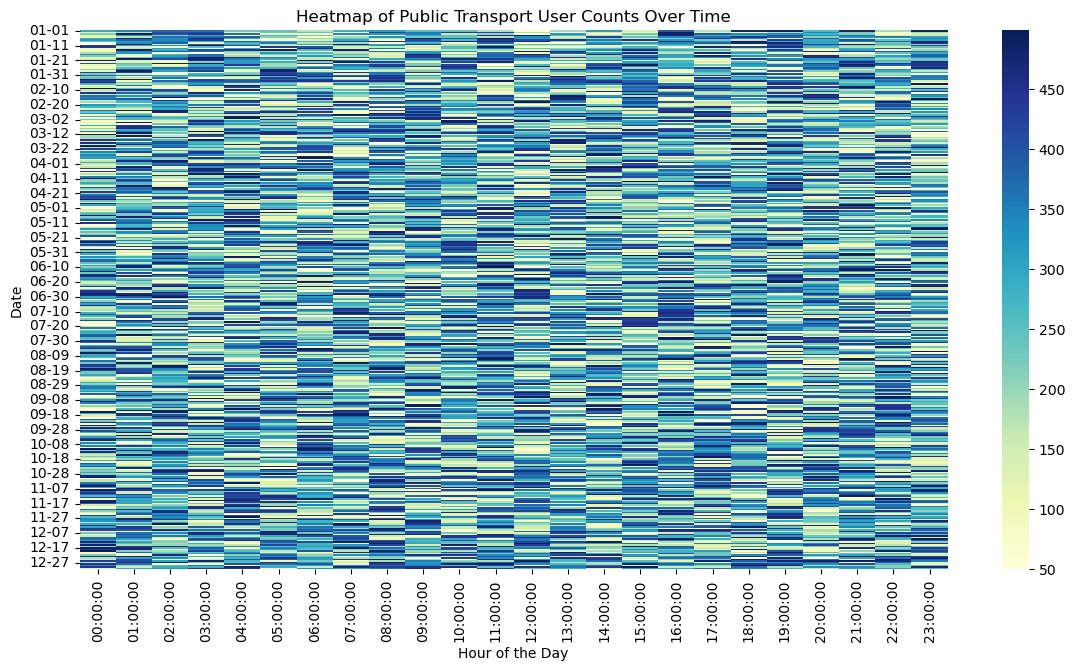

In [9]:
import matplotlib.dates as mdates

pivot_table = filtered_df.pivot_table(index=filtered_df.index, columns='time', values='public_transport_usage', aggfunc='sum')
plt.figure(figsize=(14, 7))
heatmap = sns.heatmap(pivot_table, cmap='YlGnBu')

# Format the y-axis labels to show MM-DD
date_format = mdates.DateFormatter('%m-%d')
plt.gca().yaxis.set_major_formatter(date_format)

plt.xlabel('Hour of the Day')
plt.ylabel('Date')
plt.title('Heatmap of Public Transport User Counts Over Time')
plt.show()

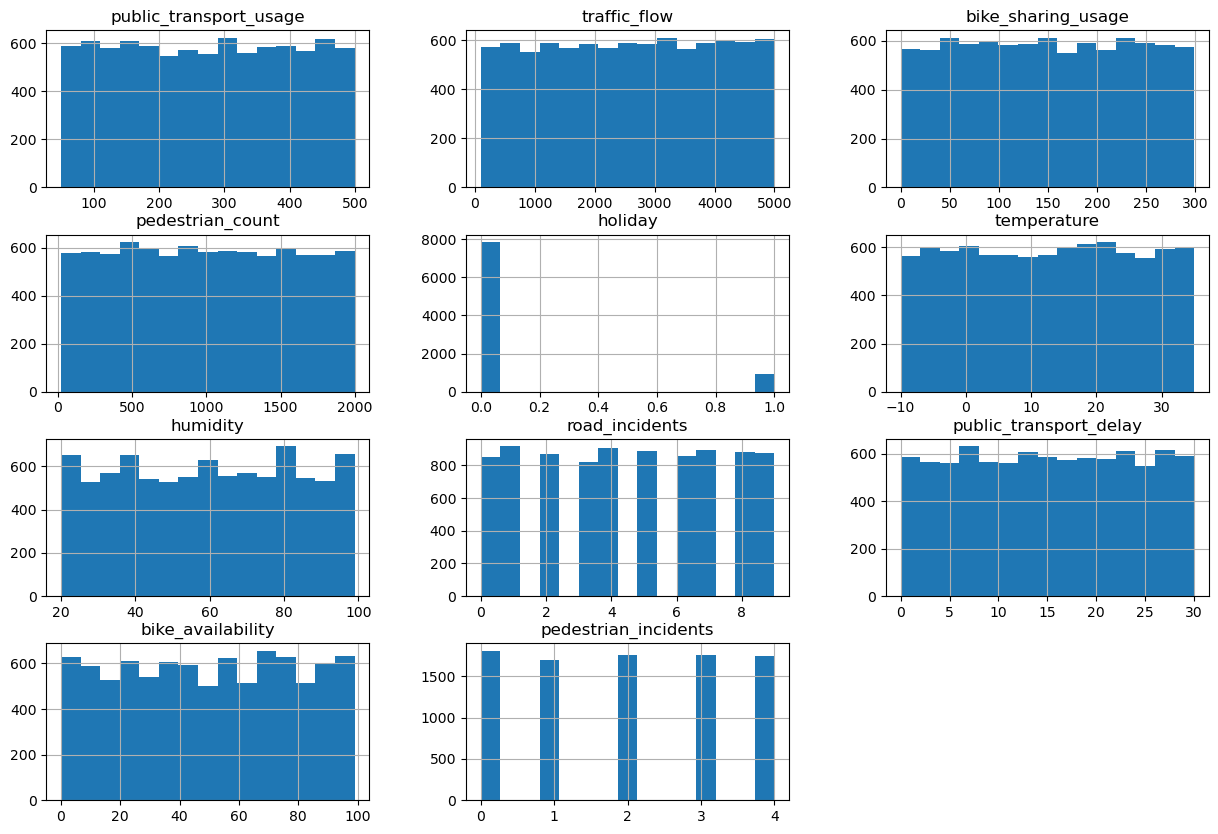

In [11]:
# Plot the distribution of the numerical values of the dataset
filtered_df.hist(bins=15, figsize=(15,10))
plt.show()

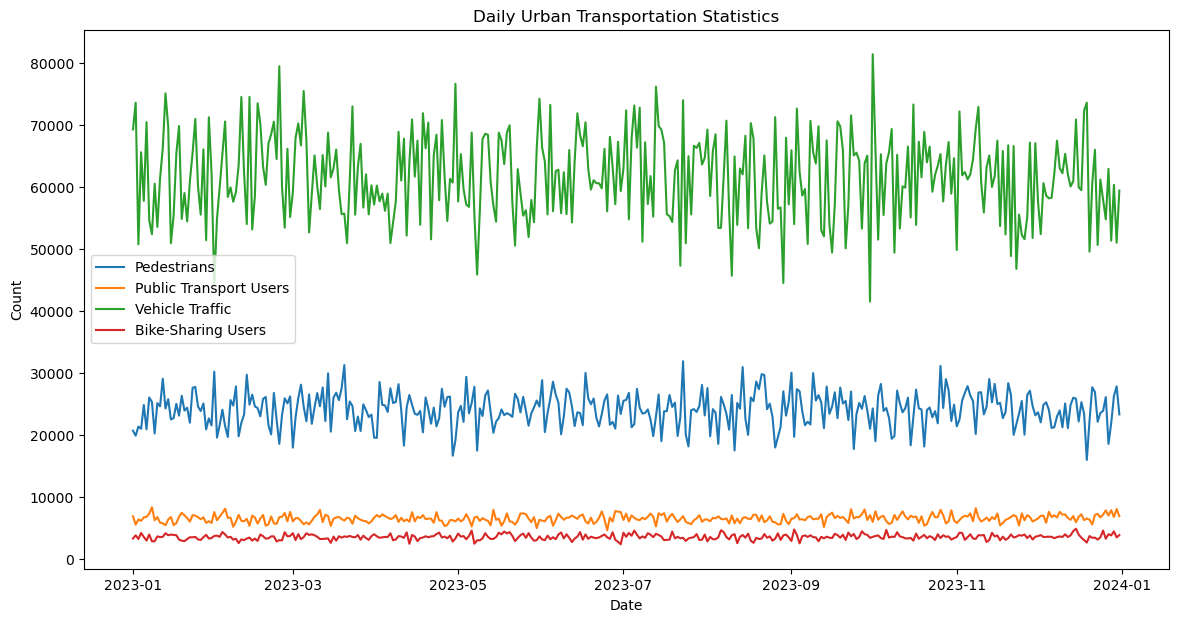

In [12]:
# Initialize dataframe for aggregated daily statistics
daily_df = pd.DataFrame()

# Resample data to get daily pedestrian count
daily_df['pedestrian_count'] = filtered_df['pedestrian_count'].resample('D').sum()
daily_df['public_transport_usage'] = filtered_df['public_transport_usage'].resample('D').sum()
daily_df['traffic_flow'] = filtered_df['traffic_flow'].resample('D').sum()
daily_df['bike_sharing_usage'] = filtered_df['bike_sharing_usage'].resample('D').sum()

# Plot daily urban mobility
plt.figure(figsize=(14, 7))
labels = ['Pedestrians','Public Transport Users','Vehicle Traffic','Bike-Sharing Users']
plt.plot(daily_df, label=labels)

# Format plot
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Urban Transportation Statistics')
plt.legend()
plt.show()

In [13]:
# Group by date and aggregate events
events_df = filtered_df.dropna(subset=['event']).groupby('date')['event'].unique().reset_index()
events_df

,date,event
0,2023-01-01,"[Festival, Concert]"
1,2023-01-02,"[Sports, Concert, Festival]"
2,2023-01-03,[Sports]
3,2023-01-04,[Sports]
4,2023-01-05,"[Festival, Concert]"
...,...,...
356,2023-12-27,"[Festival, Sports, Concert]"
357,2023-12-28,"[Concert, Sports]"
358,2023-12-29,"[Sports, Concert]"
359,2023-12-30,"[Concert, Sports]"


The dataset includes recorded events throughout the entire year.

In [15]:
# Selecting weather-related features
weather_columns = ['time','temperature','humidity','weather_conditions']
weather_df = filtered_df[weather_columns]
weather_df

,time,temperature,humidity,weather_conditions
date,,,,
2023-01-01,00:00:00,24.547380,29,Clear
2023-01-01,01:00:00,31.801722,99,Snow
2023-01-01,02:00:00,0.052832,34,Rain
2023-01-01,03:00:00,-3.757874,41,Rain
2023-01-01,04:00:00,-4.948219,45,Snow
...,...,...,...,...
2023-12-31,19:00:00,-3.391895,80,Snow
2023-12-31,20:00:00,24.825429,36,Fog
2023-12-31,21:00:00,-9.937907,26,Fog


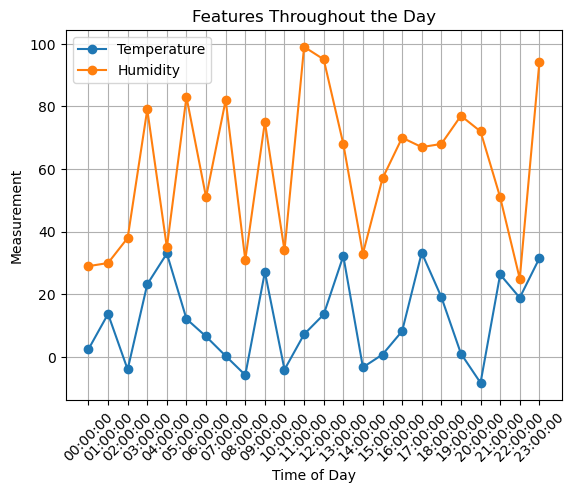

In [17]:
# Specify the date you want to filter
specific_date = '2023-07-19'

# Convert the specific_date to a datetime object
specific_date = pd.to_datetime(specific_date)

# Filter rows for the specific date using the index
date_df = weather_df.loc[specific_date]

plt.plot(date_df['time'].astype(str), date_df['temperature'], label='Temperature', marker='o')
plt.plot(date_df['time'].astype(str), date_df['humidity'], label='Humidity', marker='o')
plt.xlabel('Time of Day')
plt.ylabel('Measurement')
plt.title('Features Throughout the Day')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()